Comparing Lowpass and Pass-through Parameters
---

Contrary to previous discussions, the lowpass runs were actually already
applying the same filter to the parameters. So I've added an option
to skip this filtering.  The plots below pull one segment (South Bay
Channel) and plot the time series for with/without filtering.


In [58]:
import stompy.model.delft.waq_scenario as dwaq
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [29]:
# Newly created nontidal hydro with tidal parameters 
agg141_pass=dwaq.HydroFiles("/hpcvol1/rusty/dwaq/agg141_tau-lp-pass_params/com-agg141_tau-lp.hyd")

In [30]:
# Previous nontidal hydro with nontidal parameters
agg141_lp=dwaq.HydroFiles("/hpcvol1/rusty/dwaq/agg141_tau-lp/com-agg141_tau-lp.hyd")

<IPython.core.display.Javascript object>


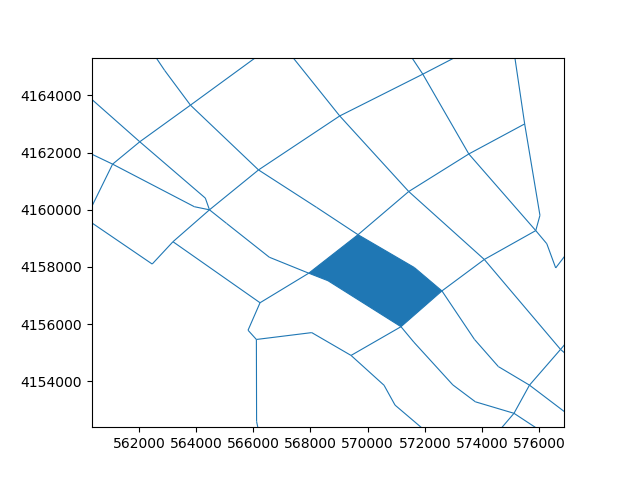

In [59]:
# Pick and display the segment that will be extracted
g=agg141_pass.grid()
x=np.array([570577,4157410])
c=g.select_cells_nearest(x)
plt.figure()
g.plot_edges()
g.plot_cells(mask=[c])

In [53]:
# map that back to a segment 
agg141_pass.infer_2d_elements()

# pull mid-water column.  Tau is set throughout the water column,
# even though it is a bed quantity. however vertdisper in the 
# bottom layer is 0.
seg_sel= (agg141_pass.seg_to_2d_element==c)&(agg141_pass.seg_k==4)
segs=np.nonzero(seg_sel)[0]
assert len(segs)==1 # sanity check.
seg=segs[0]
seg

577

INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred


<IPython.core.display.Javascript object>


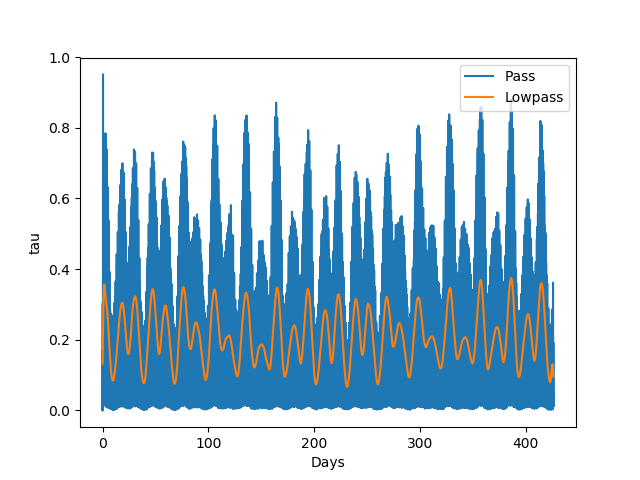

INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred


<IPython.core.display.Javascript object>


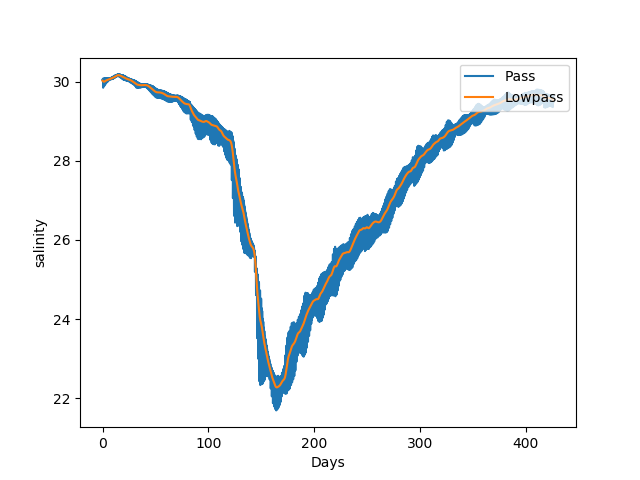

INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred
INFO:HydroFiles:Bottom depths will be inferred
INFO:HydroFiles:Segment depth will be inferred


<IPython.core.display.Javascript object>


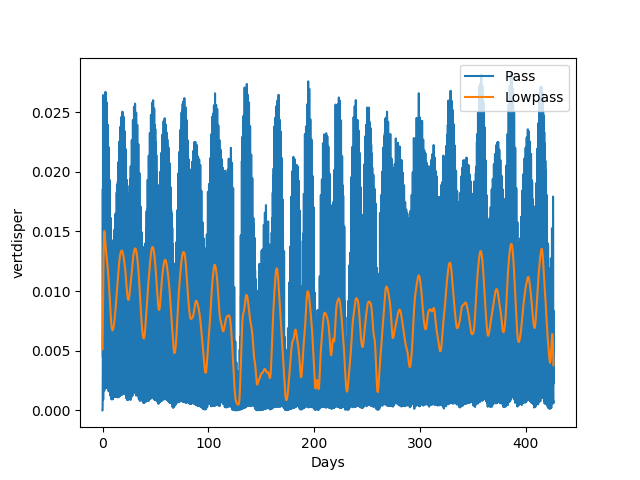

In [54]:
for param in ['tau','salinity','vertdisper']:
    param_pass=agg141_pass.parameters()[param].evaluate(seg=seg)
    param_lp  =agg141_lp.parameters()[param].evaluate(seg=seg)

    plt.figure()
    plt.plot( param_pass.times/86400., param_pass.values, label='Pass')
    plt.plot( param_lp.times/86400., param_lp.values, label="Lowpass")
    plt.legend(loc='upper right')
    plt.ylabel(param) 
    plt.xlabel('Days')